In [1]:
# Common libraries
import numpy as np 
import pandas as pd 
from scipy.stats import norm 
import os

# Sklearn libraries
# BaseEstimator is a helper class provided by scikit-learn to make it easier to create your own custom models or transformers that behave like 
# any other scikit-learn model. 
# MetaEstimatorMixin is a mixin class from sksklearn.base to help create meta-estimators, which are estimators that wrap other estimators.
from sklearn.base import BaseEstimator, MetaEstimatorMixin, ClassifierMixin
# The clone function creates a new copy of an estimator with the same parameters, but without any trained data, without any fitted attributes. 
from sklearn.base import clone as skclone 
from sklearn.base import is_classifier
from sklearn.ensemble._base import _set_random_states

# Models
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.semi_supervised import SelfTrainingClassifier

# Utils
from sklearn.utils import check_random_state, resample
from sklearn.utils import check_X_y, check_array
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.metaestimators import available_if

# Selection classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    auc,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve,
    log_loss)

from sklearn.metrics import classification_report

# Simulation functions
from sklearn.datasets import make_classification, make_blobs
from adspy_shared_utilities import plot_class_regions_for_classifier

# Visualization libraries
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

# Data
from sklearn.datasets import load_iris

# SSlearn library
from sslearn.utils import calculate_prior_probability, check_classifier
from sslearn.model_selection import artificial_ssl_dataset
from sslearn.wrapper import Setred

# SETRED
from setred_package import setred_scratch, simulated_data,  setred_scratch_v2

import inspect

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. Create a dataset with 2 informative features and clear class separation
X_ori, y_ori = make_classification(
    n_samples=1000,
    n_features=2,              # 2 features = easy to visualize
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    flip_y=0.01,               # Add slight label noise
    class_sep=1.5,
    random_state=42
)



# Spliting the data

In [14]:
from sklearn.preprocessing import StandardScaler
from sslearn.model_selection import artificial_ssl_dataset

In [15]:
X,X_test,y,y_test = train_test_split(X_ori, y_ori, test_size=0.25, random_state=42, stratify=y_ori)

X, y, X_unlabel, y_unlabel = artificial_ssl_dataset(X, y, label_rate=0.1, random_state=42)

# Standardize the explanatory variables (features)
scaler = StandardScaler()

# Fit scaler on the full original dataset (or on labeled only if preferred)

# Apply standardization
X_ori = scaler.fit_transform(X_ori)
X = scaler.transform(X)
X_unlabel = scaler.transform(X_unlabel)


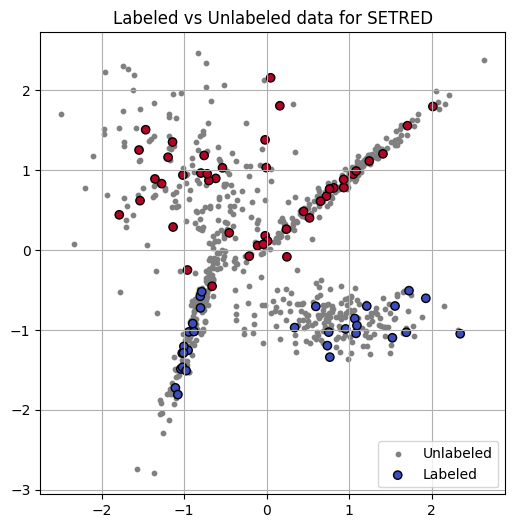

In [16]:
X_labeled = X[y != -1]  # Labeled data
y_labeled = y[y != -1]  # Corresponding labels for labeled data
# 4. Plot for visualization
plt.figure(figsize=(6, 6))
plt.scatter(X_unlabel[:, 0], X_unlabel[:, 1], c='gray', label='Unlabeled', s=10)
plt.scatter(X_labeled[:, 0], X_labeled[:, 1], c=y_labeled, cmap='coolwarm', label='Labeled', edgecolor='k')
plt.title("Labeled vs Unlabeled data for SETRED")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
base_estimator_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
X_val = X[y != -1]  # Use labeled data for validation
y_val = y[y != -1]  # Corresponding labels for validation
# Initialize the Setred model
base_estimator_knn.fit(X_val, y_val)

KNeighborsClassifier(n_jobs=-1)

In [18]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [19]:
ssl_clf_knn = setred_scratch.Setred_scratch(base_estimator=base_estimator_knn,
                             graph_neighbors=1,
                             max_iterations=40,                             
                             htunning=True,
                             param_grid={
                                        'n_neighbors': [ 10, 15, 20, 30],
                                        'weights': ['distance', 'uniform'],
                                        'p': [2],  # 1 = Manhattan, 2 = Euclidean
                                        'metric': ['euclidean']
                                            },
                            X_label_real=X_test,
                            y_label_real=y_test,
                            y_unlabel=y_unlabel,
                            view = 10)



In [20]:
ssl_clf_knn.fit(X, y)

/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 380, in _sco

Iteration 10 - 75 labeled instances, 675 unlabeled instances left
Distribution of labels in the labeled set:
1    44
0    31
Name: count, dtype: int64
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       125
           1       0.92      0.94      0.93       125

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 380, in _sco

Iteration 20 - 75 labeled instances, 675 unlabeled instances left
Distribution of labels in the labeled set:
1    44
0    31
Name: count, dtype: int64
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       125
           1       0.93      0.94      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 380, in _sco

Iteration 30 - 75 labeled instances, 675 unlabeled instances left
Distribution of labels in the labeled set:
1    44
0    31
Name: count, dtype: int64
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       125
           1       0.93      0.94      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jfjimenez09/anaconda3/envs/jfja_dissertation/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 380, in _sco

Iteration 40 - 75 labeled instances, 675 unlabeled instances left
Distribution of labels in the labeled set:
1    44
0    31
Name: count, dtype: int64
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       125
           1       0.94      0.94      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



Setred_scratch(X_label_real=array([[ 1.30588017e+00,  1.49484688e+00],
       [ 2.06927480e+00, -1.66103561e+00],
       [-2.50169923e+00,  1.67115283e+00],
       [ 1.18564393e+00, -1.31208063e+00],
       [ 2.28457689e+00, -1.71619174e+00],
       [-1.16710039e+00, -6.01677292e-01],
       [ 4.57414110e-01,  5.87778431e-01],
       [-1.36544921e+00, -2.05633864e+00],
       [-5.42399357e-01,  7.84810492e-01],
       [-1.19334333e+00, -...
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]))

In [21]:
# Generate predictions on the test set
y_pred = ssl_clf_knn.predict(X_test)
# Generate the classification report
print("Classification report on test set after Setred:")
report = classification_report(y_test, y_pred)
print(report)

Classification report on test set after Setred:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       125
           1       0.93      0.94      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [22]:
# Generate predictions on the test set
y_pred = base_estimator_knn.predict(X_test)
# Generate the classification report
print("Classification report on test set after Setred:")
report = classification_report(y_test, y_pred)
print(report)

Classification report on test set after Setred:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       125
           1       0.92      0.95      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

